<a href="https://colab.research.google.com/github/mr-cri-spy/Deep-Learning-projects/blob/main/AI_Global_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

df = pd.read_csv("AI_GLOBAL_INDEX.csv")

Display first 5 rows

print(df.head())

Dataset info

print(df.info())

print("Summary Statistics:")
print(df.describe())

Sort by AI Index Score (change column name if needed)

top_countries = df.sort_values(by="AI_Index_Score", ascending=False).head(10)

plt.figure()
plt.bar(top_countries["Country"], top_countries["AI_Index_Score"])
plt.xlabel("Country")
plt.ylabel("AI Index Score")
plt.title("Top 10 Countries by AI Global Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["Government_Strategy"], df["AI_Readiness"])
plt.xlabel("Government AI Strategy")
plt.ylabel("AI Readiness")
plt.title("Government Strategy vs AI Readiness")
plt.show()

region_data = df.groupby("Region")["AI_Index_Score"].mean()

plt.figure()
plt.pie(region_data, labels=region_data.index, autopct="%1.1f%%")
plt.title("Average AI Index Score by Region")
plt.show()

plt.figure()
plt.hist(df["AI_Index_Score"], bins=10)
plt.xlabel("AI Index Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of AI Global Index Scores")
plt.show()

SyntaxError: invalid syntax (ipython-input-1663917767.py, line 4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [4]:
np.random.seed(42)

countries = [
    "USA","China","UK","Germany","France","India","Japan","Canada","Australia","Singapore",
    "South Korea","Brazil","Italy","Spain","Netherlands","Sweden","Norway","Finland","Denmark",
    "Switzerland","Russia","Israel","UAE","Saudi Arabia","South Africa","Mexico","Argentina",
    "Chile","Colombia","Peru","Indonesia","Thailand","Vietnam","Malaysia","Philippines",
    "New Zealand","Ireland","Belgium","Austria","Portugal","Greece","Poland","Czech Republic",
    "Hungary","Romania","Bulgaria","Turkey","Egypt","Nigeria","Kenya","Morocco","Tunisia",
    "Algeria","Ethiopia","Ghana","Ivory Coast","Senegal","Bangladesh","Sri Lanka","Nepal",
    "Pakistan","Afghanistan","Kazakhstan","Uzbekistan","Turkmenistan","Azerbaijan","Armenia",
    "Georgia","Ukraine","Belarus","Latvia","Lithuania","Estonia","Iceland","Luxembourg"
]

n = len(countries)

data = {
    "Country": countries,
    "R&D_Investment": np.random.randint(50, 1000, n),
    "AI_Researchers": np.random.randint(100, 50000, n),
    "AI_Startups": np.random.randint(10, 5000, n),
    "Patent_Count": np.random.randint(20, 20000, n),
    "Cloud_Infrastructure": np.random.randint(1, 100, n),
    "Data_Availability": np.random.randint(1, 100, n),
    "Compute_Power": np.random.randint(1, 100, n),
    "AI_Adoption_Rate": np.random.randint(1, 100, n),
    "Education_Index": np.random.randint(40, 100, n),
    "STEM_Graduates": np.random.randint(500, 100000, n),
    "Govt_AI_Policies": np.random.randint(1, 50, n),
    "Private_Investment": np.random.randint(50, 2000, n),
    "Ethics_Score": np.random.randint(1, 100, n),
    "Cybersecurity": np.random.randint(1, 100, n),
    "AI_Talent_Index": np.random.randint(1, 100, n),
    "Innovation_Index": np.random.randint(1, 100, n),
    "Tech_Exports": np.random.randint(100, 100000, n),
    "Automation_Level": np.random.randint(1, 100, n),
    "Robotics_Usage": np.random.randint(1, 100, n),
    "AI_Publications": np.random.randint(10, 20000, n),
}

df = pd.DataFrame(data)
df.head()


,Country,R&D_Investment,AI_Researchers,AI_Startups,Patent_Count,Cloud_Infrastructure,Data_Availability,Compute_Power,AI_Adoption_Rate,Education_Index,...,Govt_AI_Policies,Private_Investment,Ethics_Score,Cybersecurity,AI_Talent_Index,Innovation_Index,Tech_Exports,Automation_Level,Robotics_Usage,AI_Publications
0,USA,152,17259,2700,4409,8,48,12,74,91,...,25,1983,19,10,38,23,76177,85,34,5485
1,China,485,45074,3850,2347,7,39,1,43,98,...,2,627,21,67,37,63,90574,49,35,7194
2,UK,910,41094,1038,8024,67,93,58,44,60,...,10,124,5,18,11,15,2543,71,96,12885
3,Germany,320,14641,512,19335,17,42,1,29,75,...,30,484,82,86,77,97,76093,81,88,1632
4,France,156,36020,4503,7797,33,26,34,13,92,...,45,152,92,34,3,25,76016,84,78,15998


In [5]:
df.to_csv("AI_Global_Index_Dataset.csv", index=False)


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               75 non-null     object
 1   R&D_Investment        75 non-null     int64 
 2   AI_Researchers        75 non-null     int64 
 3   AI_Startups           75 non-null     int64 
 4   Patent_Count          75 non-null     int64 
 5   Cloud_Infrastructure  75 non-null     int64 
 6   Data_Availability     75 non-null     int64 
 7   Compute_Power         75 non-null     int64 
 8   AI_Adoption_Rate      75 non-null     int64 
 9   Education_Index       75 non-null     int64 
 10  STEM_Graduates        75 non-null     int64 
 11  Govt_AI_Policies      75 non-null     int64 
 12  Private_Investment    75 non-null     int64 
 13  Ethics_Score          75 non-null     int64 
 14  Cybersecurity         75 non-null     int64 
 15  AI_Talent_Index       75 non-null     int6

,R&D_Investment,AI_Researchers,AI_Startups,Patent_Count,Cloud_Infrastructure,Data_Availability,Compute_Power,AI_Adoption_Rate,Education_Index,STEM_Graduates,Govt_AI_Policies,Private_Investment,Ethics_Score,Cybersecurity,AI_Talent_Index,Innovation_Index,Tech_Exports,Automation_Level,Robotics_Usage,AI_Publications
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,481.013333,23120.360000,2665.693333,9967.960000,49.360000,50.000000,49.840000,51.640000,69.826667,45080.653333,23.973333,951.306667,48.026667,49.040000,44.72000,45.586667,48245.466667,54.040000,49.120000,9447.306667
std,259.566452,14565.733564,1351.693322,5783.907723,28.852205,28.400609,29.793905,30.990251,17.713465,25257.681359,14.944016,611.352642,30.175600,29.657249,29.06682,27.196529,28112.999305,29.818568,30.714448,6079.898157
min,63.000000,261.000000,212.000000,217.000000,2.000000,5.000000,1.000000,2.000000,40.000000,4209.000000,1.000000,92.000000,1.000000,1.000000,1.00000,2.000000,226.000000,1.000000,1.000000,70.000000
25%,277.500000,11349.500000,1573.000000,5099.500000,27.000000,23.500000,24.000000,23.500000,54.000000,24732.000000,10.500000,369.500000,21.500000,23.000000,17.50000,26.500000,23733.000000,31.000000,22.500000,3644.500000
50%,477.000000,23347.000000,2739.000000,9657.000000,46.000000,52.000000,51.000000,49.000000,70.000000,41930.000000,25.000000,897.000000,47.000000,52.000000,40.00000,42.000000,47982.000000,55.000000,46.000000,8952.000000
75%,703.500000,36592.500000,3729.500000,14557.500000,67.000000,65.500000,72.500000,81.500000,84.000000,62135.500000,34.500000,1460.500000,78.000000,70.000000,70.50000,67.500000,70771.000000,83.000000,79.500000,15112.000000
max,947.000000,49316.000000,4941.000000,19574.000000,99.000000,99.000000,96.000000,99.000000,99.000000,97507.000000,49.000000,1985.000000,99.000000,98.000000,99.00000,97.000000,99231.000000,97.000000,99.000000,19943.000000


In [7]:
df.isnull().sum()


,0
Country,0
R&D_Investment,0
AI_Researchers,0
AI_Startups,0
Patent_Count,0
Cloud_Infrastructure,0
Data_Availability,0
Compute_Power,0
AI_Adoption_Rate,0
Education_Index,0


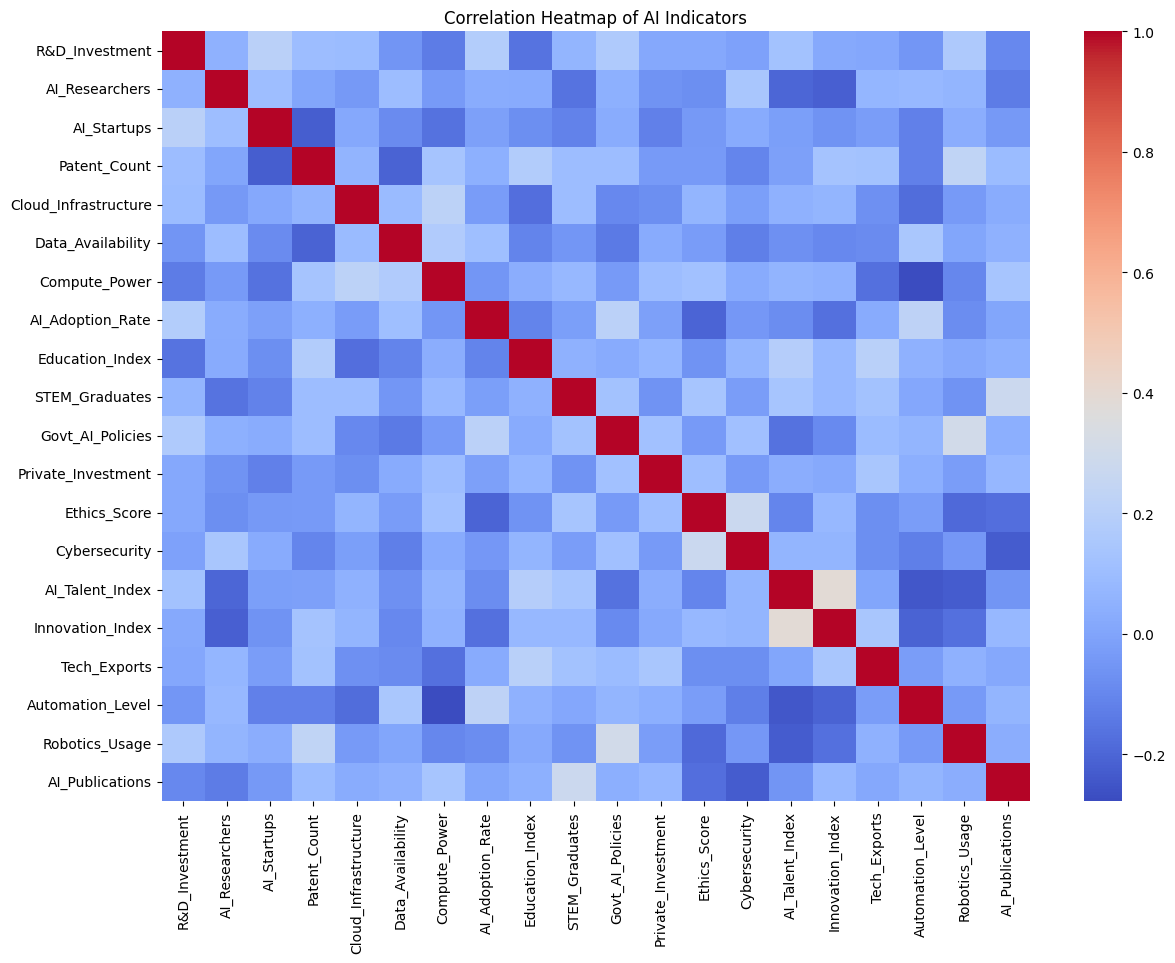

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop("Country", axis=1).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of AI Indicators")
plt.show()


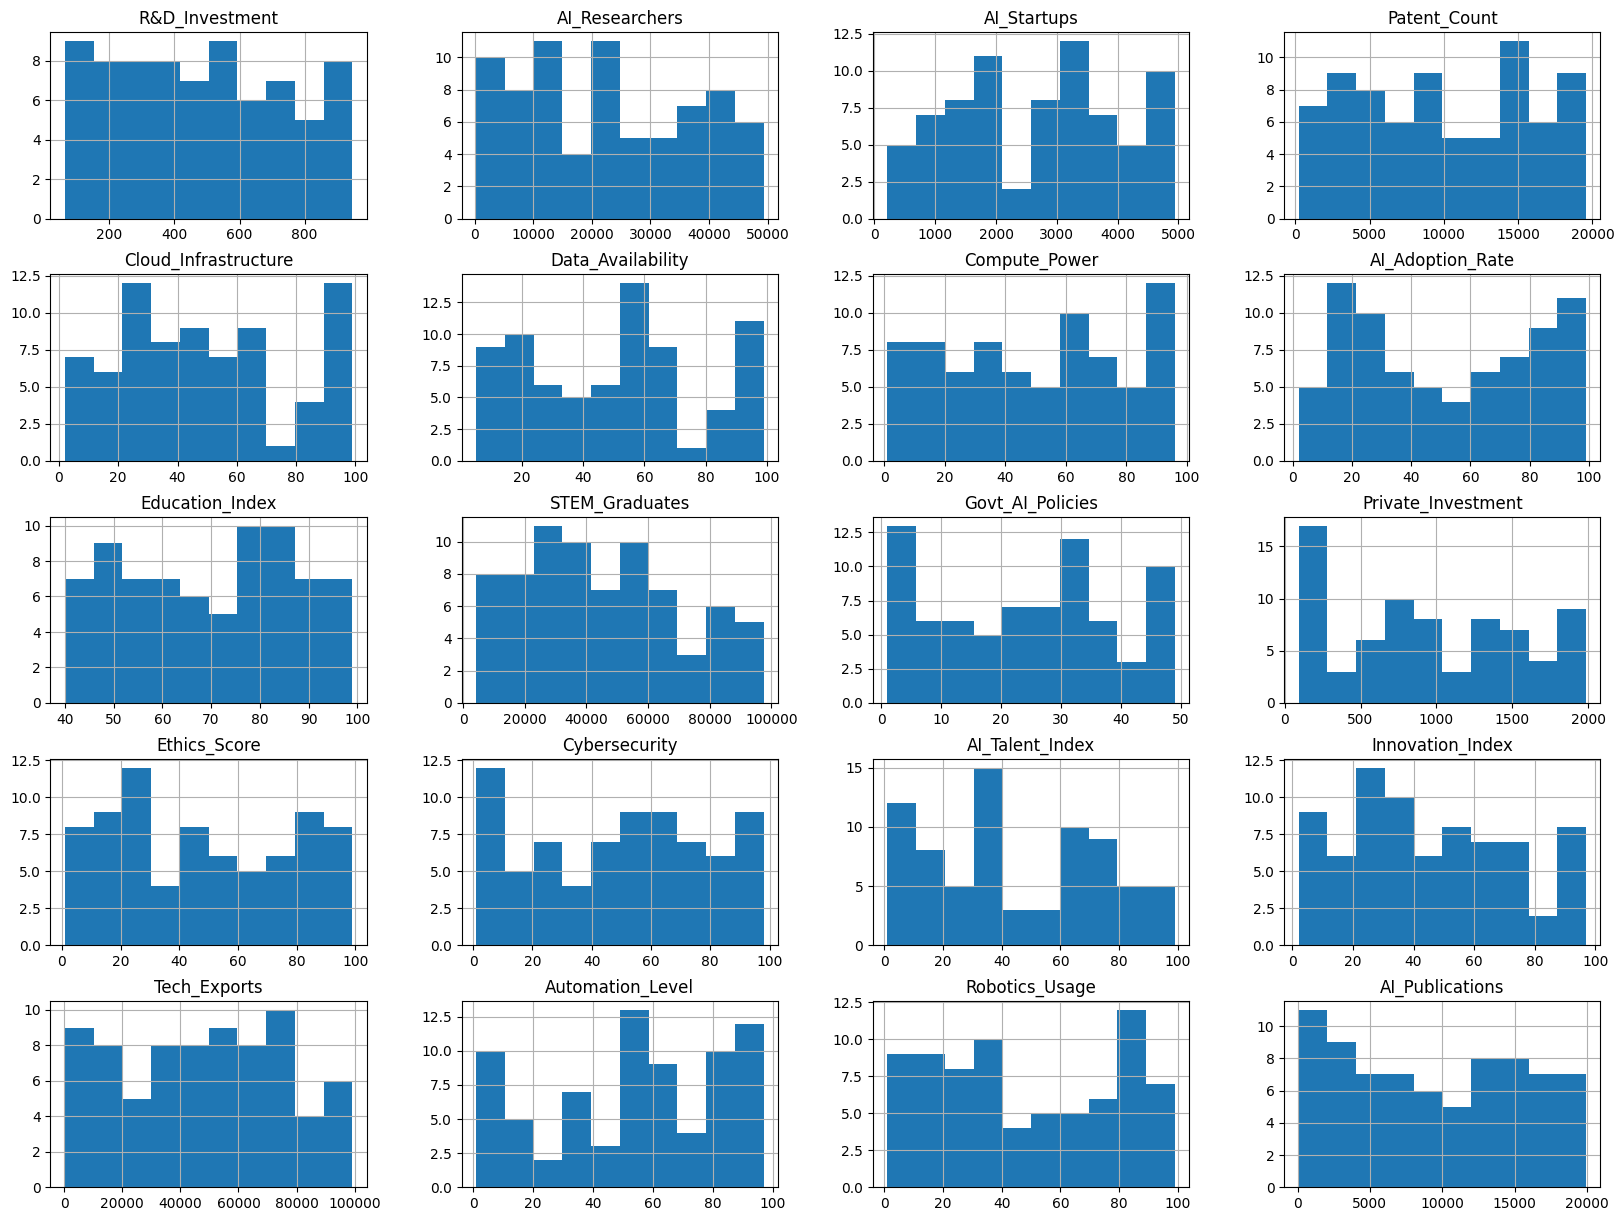

In [9]:
df.drop("Country", axis=1).hist(figsize=(20,15))
plt.show()


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("Country", axis=1))


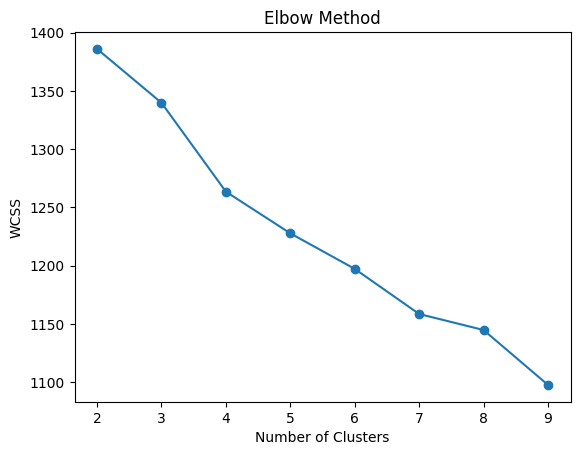

In [11]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df["Cluster"] = clusters
df.head()


,Country,R&D_Investment,AI_Researchers,AI_Startups,Patent_Count,Cloud_Infrastructure,Data_Availability,Compute_Power,AI_Adoption_Rate,Education_Index,...,Private_Investment,Ethics_Score,Cybersecurity,AI_Talent_Index,Innovation_Index,Tech_Exports,Automation_Level,Robotics_Usage,AI_Publications,Cluster
0,USA,152,17259,2700,4409,8,48,12,74,91,...,1983,19,10,38,23,76177,85,34,5485,1
1,China,485,45074,3850,2347,7,39,1,43,98,...,627,21,67,37,63,90574,49,35,7194,1
2,UK,910,41094,1038,8024,67,93,58,44,60,...,124,5,18,11,15,2543,71,96,12885,1
3,Germany,320,14641,512,19335,17,42,1,29,75,...,484,82,86,77,97,76093,81,88,1632,2
4,France,156,36020,4503,7797,33,26,34,13,92,...,152,92,34,3,25,76016,84,78,15998,1


In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]


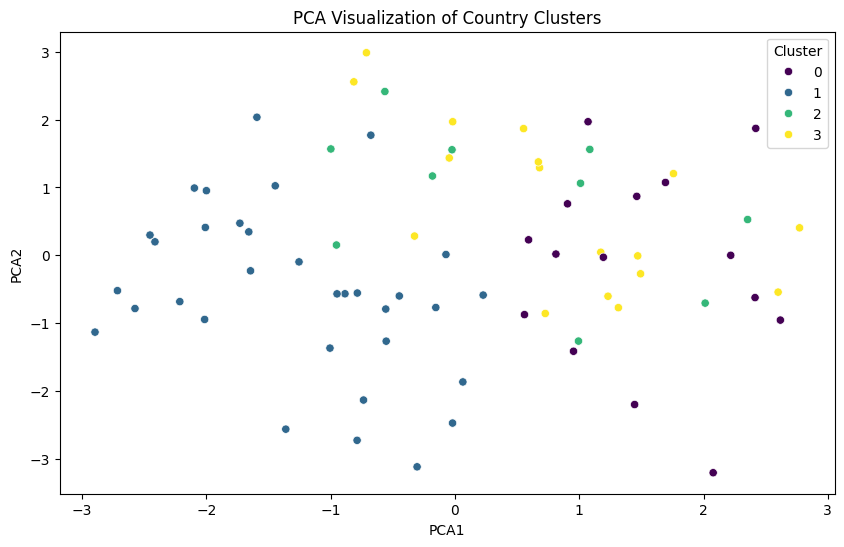

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis")
plt.title("PCA Visualization of Country Clusters")
plt.show()


In [16]:
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
cluster_summary

,R&D_Investment,AI_Researchers,AI_Startups,Patent_Count,Cloud_Infrastructure,Data_Availability,Compute_Power,AI_Adoption_Rate,Education_Index,STEM_Graduates,...,Ethics_Score,Cybersecurity,AI_Talent_Index,Innovation_Index,Tech_Exports,Automation_Level,Robotics_Usage,AI_Publications,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,383.333333,16215.666667,2355.733333,9369.400000,42.400000,38.866667,71.666667,32.133333,77.266667,46892.400000,...,50.066667,66.600000,63.000000,59.666667,31674.400000,32.400000,43.866667,11378.133333,1.496127,-0.168388
1,515.060606,27589.545455,3192.939394,7326.121212,43.545455,57.818182,40.303030,58.212121,62.787879,33304.878788,...,46.121212,48.606061,29.121212,29.909091,42671.636364,63.242424,56.121212,8407.515152,-1.263995,-0.541486
2,473.600000,26144.200000,1478.400000,15389.200000,44.800000,31.000000,36.800000,46.200000,80.600000,46413.500000,...,67.100000,63.800000,42.500000,63.200000,64965.600000,57.400000,46.900000,4215.400000,0.473797,0.803619
3,505.470588,18758.529412,2614.117647,12435.411765,69.470588,55.823529,56.764706,59.294118,70.588235,65556.882353,...,38.705882,25.705882,60.176471,53.235294,63851.411765,53.294118,41.470588,12839.647059,0.854821,0.726980
